In [2]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import NV
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Phi: 127.300624 +/- 0.738267
Theta: 43.195803 or +/- 0.547640
Phi(naive): 120.337000
Theta(naive): 46.951884


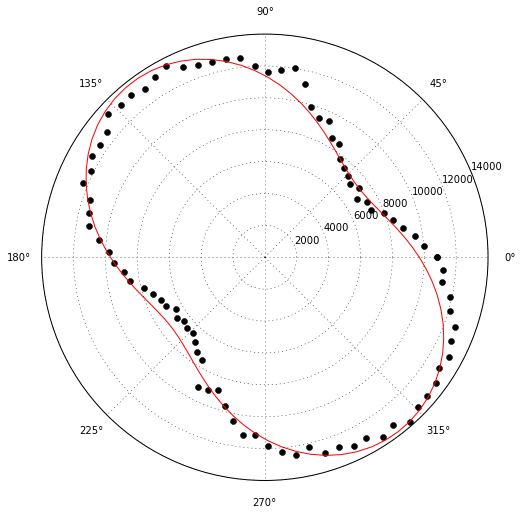

In [2]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\8-6-16\MNP 2 on CPW 5mW scan 3 x136 y693 B0V 1.5mW rotor sweep')
t[:,1] = t[:,1]-3200
NV.OrientPol(t)

Phi: 125.397084 +/- 0.674036
Theta: 44.671979 or +/- 0.515015
Phi(naive): 124.382000
Theta(naive): 48.391209


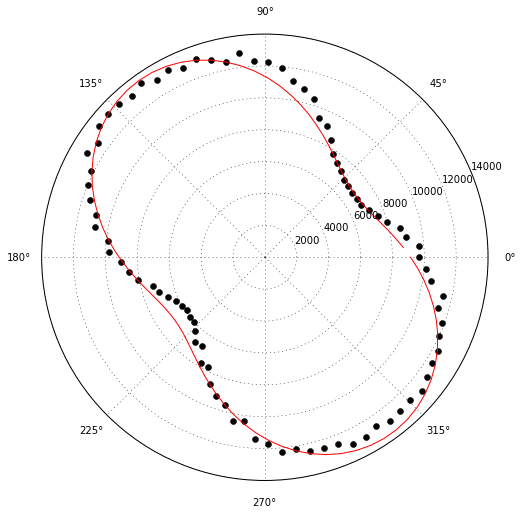

In [3]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\8-6-16\MNP 2 on CPW 5mW scan 3 x136 y693 B0V 1.5mW rotor sweep 2')
t[:,1] = t[:,1]-3200
NV.OrientPol(t)

X field: 3.61 +/- 0.03 mT 
Y field: 9.11 +/- 0.04 mT 
Z field: 6.45 +/- 0.03 mT
B: 13.00 +/- 0.07
Phi: 68.39 +/- 0.40
Theta: 48.90 or 131.10


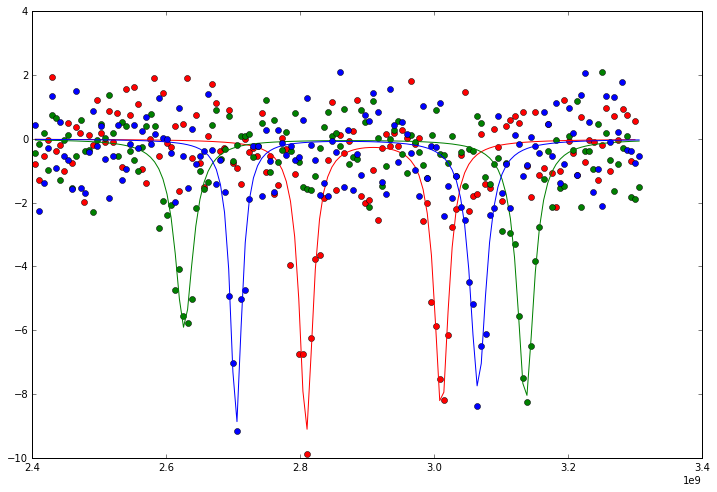

In [4]:
X = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\8-6-16\MNP 2 on CPW 5mW scan 3 x136 y693 B0.5V ODMR T0')
Y = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\8-6-16\MNP 2 on CPW 5mW scan 3 x136 y693 B0.5V ODMR T90')
Z = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\8-6-16\MNP 2 on CPW 5mW scan 3 x136 y693 B0.5V ODMR T0 x15_4')
NV.OrientODMR(X,Y,Z)

In [3]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh import palettes
output_notebook()
TOOLS = "save,box_zoom,box_select,crosshair,hover,resize,reset"
import pandas as pd
import glob

Loading BokehJS ...

In [6]:
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\8-6-16\MNP #2 wash CPW 5mW scan 2 x125 y92 T138.8  d_5.3 *V.txt')
output_file("8-6-16 MNP x125 y92 T138.8  d_5.3 ODMR.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::3]
Bs = np.linspace(0,2,len(files))*(11/0.5)
p = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[4,0],bsweep[-2,0]],tools=TOOLS)
p.image(image=[diffs],x=Bs[0], y=bsweep[4,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[4,0]], palette='RdPu9')
show(p)

In [7]:
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\8-6-16\MNP #2 wash CPW 5mW scan 2 x136 y93 T77 d_5.2 *V.txt')
output_file("8-6-16 MNP #2 wash CPW 5mW scan 2 x136 y93 T77 d_5.2 ODMR.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::3]
Bs = np.linspace(0,2,len(files))*(11/0.5)
p = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[4,0],bsweep[-2,0]],tools=TOOLS)
p.image(image=[diffs],x=Bs[0], y=bsweep[4,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[4,0]], palette='RdPu9')
show(p)

In [4]:
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\8-6-16\MNP #2 wash CPW 5mW scan 2 x125 y92 T138.8  d_-5.3 *V.txt')
output_file("8-6-16 MNP #2 wash CPW 5mW scan 2 x125 y92 T138.8  d_-5.3 ODMR.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::3]
Bs = np.linspace(0,1.47,len(files))*(11/0.5)
p = figure(x_range=[Bs[0],Bs[-1]+(Bs[2]-Bs[1])], y_range=[bsweep[0,0],bsweep[-1,0]],tools=TOOLS)
p.image(image=[diffs],x=Bs[0], y=bsweep[0,0], dw=[Bs[-1]+(Bs[2]-Bs[1])], dh=[bsweep[-1,0]-bsweep[0,0]], palette='RdPu9')
p.line(Bs,2.865E9+Bs*28E6,line_dash=(6,6),line_color='black')
p.line(Bs,2.865E9-Bs*28E6,line_dash=(6,6),line_color='black')
show(p)

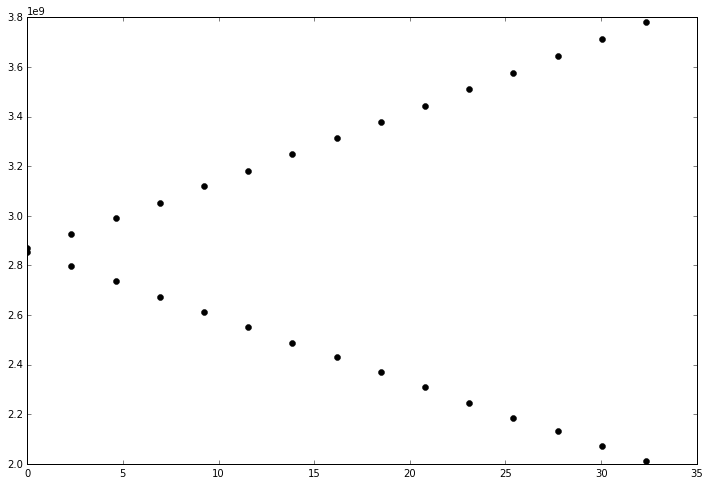

In [5]:
freq = bsweep[:,0]
fits = np.zeros((diffs.shape[1],6))
for i in range(0,diffs.shape[1]):
    O = diffs[:,i]*100
    opt, cov = curve_fit(NV.ODMRfit,freq,O,p0=(-4E10,freq[np.argmin(O)],6E7,-4E10,2.87E9*2-freq[np.argmin(O)],1E7),maxfev=2500)
    fits[i,:] = opt

mask = (fits[:,1]<fits[:,4])
mins = fits[:,1]*mask + fits[:,4]*~mask
maxs = fits[:,1]*~mask + fits[:,4]*mask

plt.plot(Bs,mins,'ko')
plt.plot(Bs,maxs,'ko')

In [26]:
np.savetxt(r'C:\Users\Ouyang Group\Documents\Data\8-8-16\MNP #2 wash CPW 5mW scan 2 x125 y92 T138.8  d_-5.3 upper freq.txt'
           ,np.vstack((Bs*0.5/11,maxs)).T,fmt='%f',delimiter='\t')

np.savetxt(r'C:\Users\Ouyang Group\Documents\Data\8-8-16\MNP #2 wash CPW 5mW scan 2 x125 y92 T138.8  d_-5.3 lower freq.txt'
           ,np.vstack((Bs*0.5/11,mins)).T,fmt='%f',delimiter='\t')

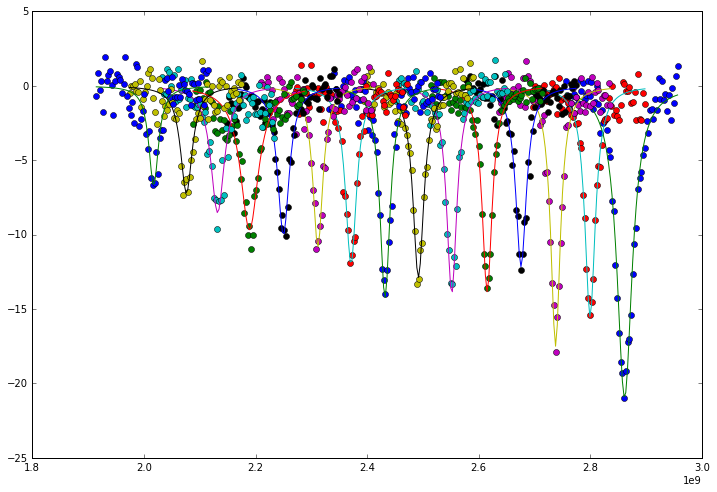

In [29]:
import re
def lorentzian_2(X,a,x0,c):
    return a*c**2/(np.pi*c*(c**2+(X-x0)**2))

files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\8-8-16\MNP #2 wash CPW 5mW scan 2 x125 y92 T138.8  d_-5.3 lower ODMR [0-9].*V ODMR')
res = np.zeros((len(files),2))
reg = re.compile(r'(\d\.\d+) V')
for i,f in enumerate(files):
    o = np.loadtxt(f)
    m = re.search(reg,f)
    opt,cov = curve_fit(NV.lorentzian_2,o[1:,0],o[1:,1],p0=(-4E8,3.6E9,1E7),maxfev=5500)
    res[i,0]=m.group(1)
    res[i,1]=opt[1]
    plt.plot(o[1:,0],o[1:,1],'o')
    plt.plot(o[1:,0],lorentzian_2(o[1:,0],*opt))
    
np.savetxt(r'C:\Users\Ouyang Group\Documents\Data\8-8-16\MNP #2 wash CPW 5mW scan 2 x125 y92 T138.8  d_-5.3 lower local freq fit.txt',res,fmt='%f',delimiter='\t')
    

In [32]:
fits = NV.BatchEpr(r'C:\Users\Ouyang Group\Documents\Data\8-8-16\MNP #2 wash CPW 5mW scan 2 x125 y92 T138.8  d_-5.3 lower Rabi  ')

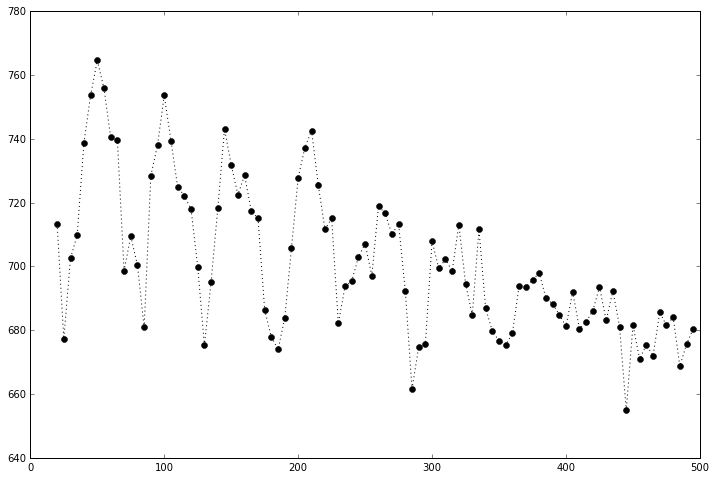

In [8]:
time,rabi0 = NV.EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\8-9-16\ND on CPW 5mW ODMR B0.5V T0 rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\8-9-16\ND on CPW 5mW ODMR B0.5V T0 rabi Pulse Seq.txt')
rabi0 = rabi0
#opt0,cov0 = curve_fit(NV.RabiFit,time[1:],rabi0[1:],maxfev=2500,p0=(6,8E-3,0,2000,-3))
plt.plot(time,rabi0,'ko:')
t = np.arange(0,500,5)
#plt.plot(t,NV.RabiFit(t,*opt0),'b-')
#print opt0

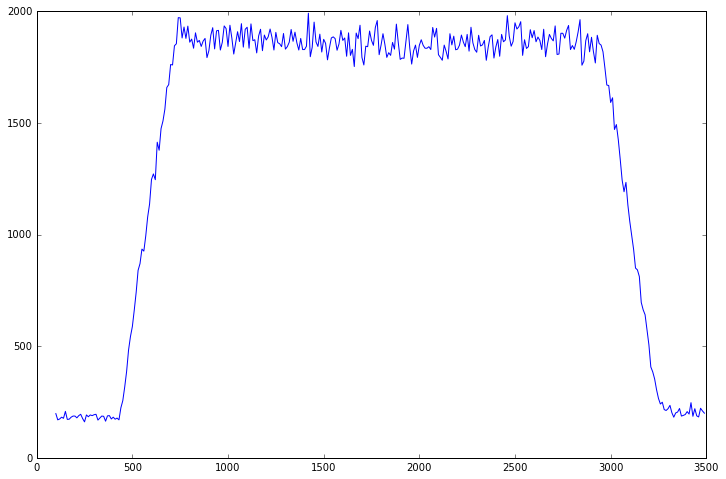

In [91]:
time = np.arange(100,3500,10)
o6 = NV.EPR_Test(r'C:\Users\Ouyang Group\Documents\Data\8-8-16\MNP #2 wash CPW 5mW  test pulse 6',time)
o5 = NV.EPR_Test(r'C:\Users\Ouyang Group\Documents\Data\8-8-16\MNP #2 wash CPW 5mW  test pulse 5',time)
o4 = NV.EPR_Test(r'C:\Users\Ouyang Group\Documents\Data\8-8-16\MNP #2 wash CPW 5mW  test pulse 4',time)
plt.plot(time,o3)
p = figure(tools=TOOLS)
p.line(time,o4/np.max(o4))
#p.line(time,o5/np.max(o5),color='red')
#p.line(time,o6/np.max(o6),color='green')
show(p)

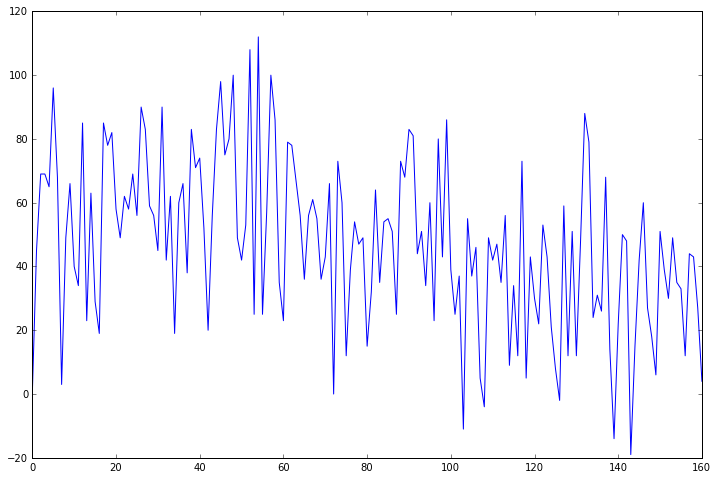

In [112]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\8-8-16\MNP #2 wash CPW 5mW scan 2 x125 y92 T138.8  d_-5.3 B0.525V Rabi old amp 6 1')
plt.plot(t[:,0]-t[:,1])
